In [4]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")
# scaler = StandardScaler()
# df = scaler.fit_transform(df_full)
df_split = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2021.csv")
# df_split = scaler.fit_transform(df_balanced_split)

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Diabetes_binary"]), df["Diabetes_binary"], stratify=df["Diabetes_binary"], test_size=0.2) #, random_state=2)

In [5]:
rf_classifier = RandomForestClassifier() #n_estimators=10) #, random_state=42)

ada_classifier = AdaBoostClassifier(
    #estimator=rf_classifier,  # Base estimator (default is DecisionTreeClassifier)
    n_estimators=80,      # Number of weak learners to train iteratively
    learning_rate=1.0,    # Learning rate shrinks the contribution of each classifier
    algorithm='SAMME',  # The algorithm to use for the boosting process
    random_state=None     # Random seed for reproducibility
)

In [6]:
ada_classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=80)

In [7]:
y_pred = ada_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#recall = recall_score(y_test, y_pred)

#print("Recall Score:", recall)

classification = classification_report(y_test, y_pred)
print(classification)

Accuracy: 0.861811489973771
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     40562
         1.0       0.54      0.17      0.26      6714

    accuracy                           0.86     47276
   macro avg       0.71      0.57      0.59     47276
weighted avg       0.83      0.86      0.83     47276



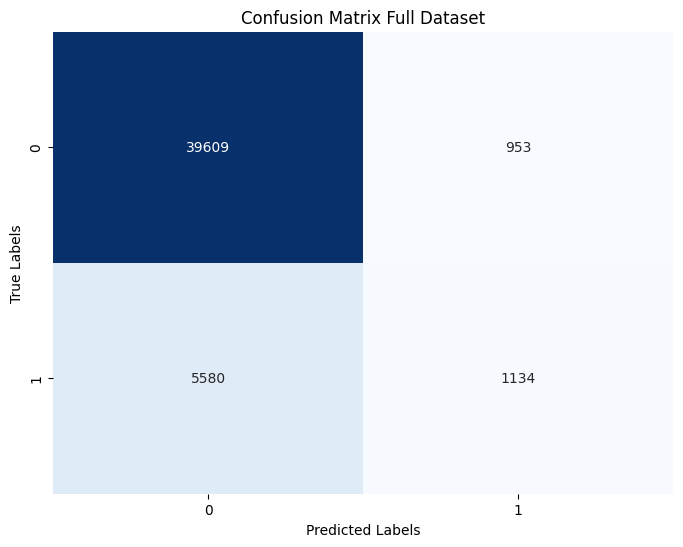

In [8]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Full Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [9]:
X_train_balance, X_test_balance, y_train_balance, y_test_balance = train_test_split(df_split.drop(columns=["Diabetes_binary"]), df_split["Diabetes_binary"], stratify=df_split["Diabetes_binary"], test_size=0.2, random_state=2)

ada_classifier = AdaBoostClassifier(
    #estimator=rf_classifier,  # Base estimator (default is DecisionTreeClassifier)
    n_estimators=100,      # Number of weak learners to train iteratively
    learning_rate=1.0,    # Learning rate shrinks contribution of each classifier
    algorithm='SAMME',  # algorithm to use for the boosting process
    random_state=None     # Random seed for reproducibility
)

ada_classifier.fit(X_train_balance, y_train_balance)

y_pred_balance = ada_classifier.predict(X_test_balance)
accuracy = accuracy_score(y_test_balance, y_pred_balance)
print("Accuracy:", accuracy)

#recall = recall_score(y_test, y_pred)

#print("Recall Score:", recall)

classification_balance = classification_report(y_test_balance, y_pred_balance)
print(classification_balance)

Accuracy: 0.7429252308608877
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6714
         1.0       0.74      0.75      0.74      6714

    accuracy                           0.74     13428
   macro avg       0.74      0.74      0.74     13428
weighted avg       0.74      0.74      0.74     13428



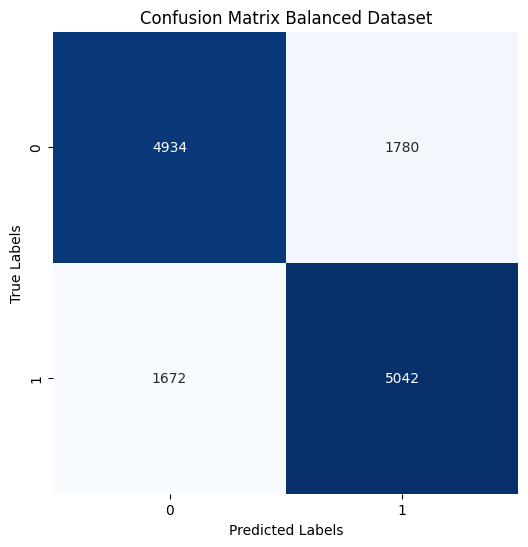

In [10]:
conf_matrix_balance = confusion_matrix(y_test_balance, y_pred_balance)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_balance, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Balanced Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Accuracy: 0.7139559130175752
              precision    recall  f1-score   support

         0.0       0.71      0.70      0.71      6614
         1.0       0.72      0.72      0.72      6814

    accuracy                           0.71     13428
   macro avg       0.71      0.71      0.71     13428
weighted avg       0.71      0.71      0.71     13428



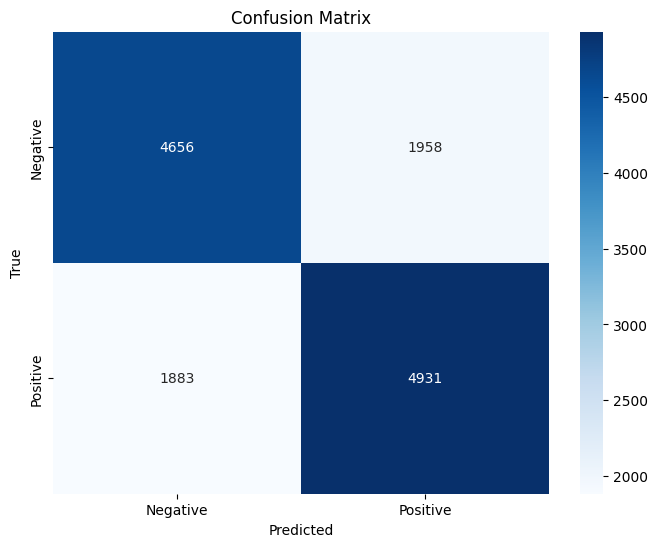

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
X = df_split.drop('Diabetes_binary', axis=1)  # Features
y = df_split['Diabetes_binary']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Instantiate Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_balance = classification_report(y_test, y_pred)
print(classification_balance)

cm = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ['Negative', 'Positive']  # 0 = Negative and 1 = Positive

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()